In [1]:
#Timeseries

In [2]:
#Data Preparation and Exploration

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
df = pd.read_csv("exchange_rate.csv", parse_dates=['date'], dayfirst=True)
df.set_index('date', inplace=True)
df

,Ex_rate
date,
1990-01-01,0.785500
1990-01-02,0.781800
1990-01-03,0.786700
1990-01-04,0.786000
1990-01-05,0.784900
...,...
2010-10-06,0.718494
2010-10-07,0.721839
2010-10-08,0.723197


In [4]:
df.columns

Index(['Ex_rate'], dtype='object')

In [5]:
df = df.asfreq('D')

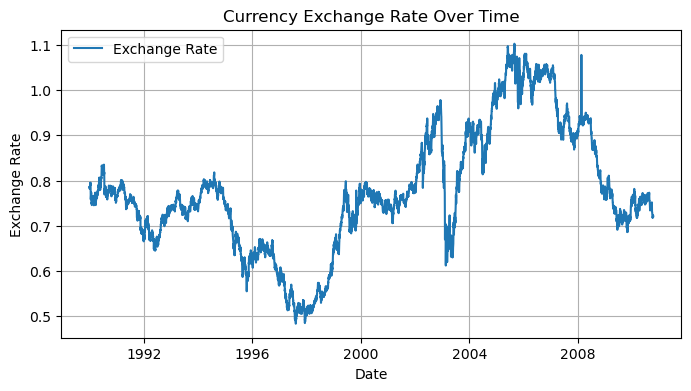

In [6]:
#Initial Exploration
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(df.index, df['Ex_rate'], label='Exchange Rate')
plt.title('Currency Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.grid(True)
plt.legend()
plt.show()


In [7]:
#Data Preprocessing
print("Missing values before:", df.isnull().sum().to_dict())
df.dropna(inplace=True)
print("Missing values after:", df.isnull().sum().to_dict())

Missing values before: {'Ex_rate': 0}
Missing values after: {'Ex_rate': 0}


In [8]:
from scipy import stats
z_scores = stats.zscore(df['Ex_rate'])
anomalies = df[np.abs(z_scores) > 3]
print("Anomalies found:\n", anomalies)

Anomalies found:
 Empty DataFrame
Columns: [Ex_rate]
Index: []


In [9]:
rolling_med = df['Ex_rate'].rolling(5, center=True, min_periods=1).median()
df['Ex_rate'] = df['Ex_rate'].mask(np.abs(z_scores) > 3, rolling_med)
df['Ex_rate'] = df['Ex_rate'].ffill()
df['Ex_rate'] = df['Ex_rate'].bfill()

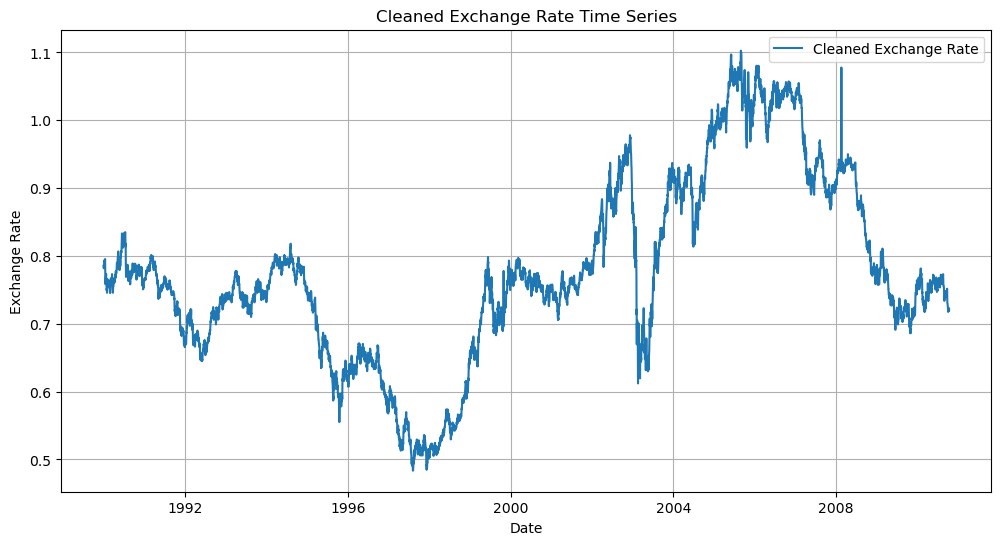

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Ex_rate'], label='Cleaned Exchange Rate')
plt.title('Cleaned Exchange Rate Time Series')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.grid(True)
plt.legend()
plt.show()

In [11]:
df.to_csv("exchange_rate_cleaned.csv")

In [12]:
#PART-2:-Model Building - ARIMA

In [13]:
#Parameter Selection for ARIMA
result = adfuller(df['Ex_rate'])
if result[1] > 0.05:
    print("Series is non-stationary. Differencing needed.")
    d = 1
else:
    print("Series is stationary.")
    d = 0

Series is non-stationary. Differencing needed.


In [14]:
df_diff = df['Ex_rate'].diff().dropna()

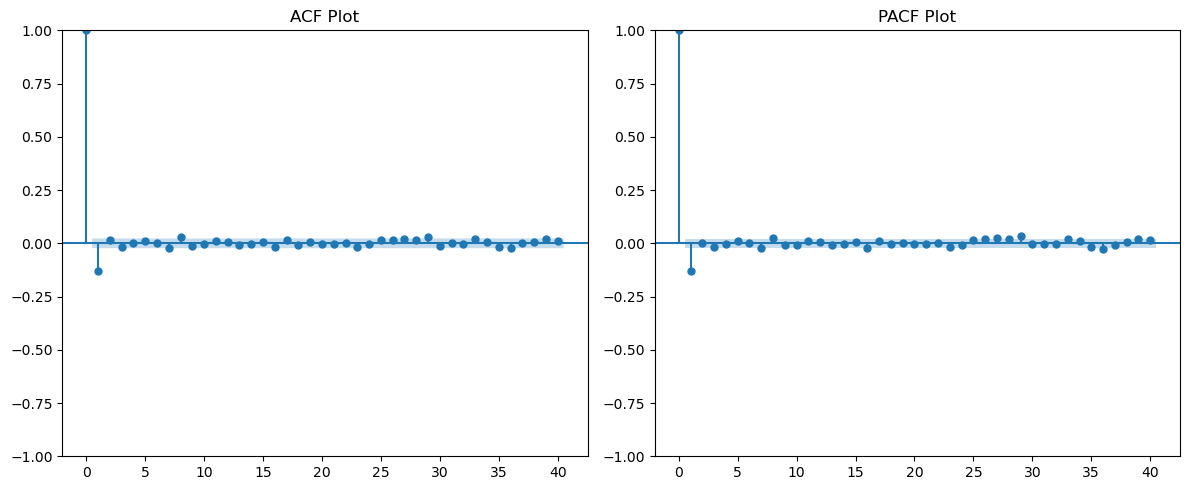

In [15]:
series_to_use = df['Ex_rate'].diff().dropna() if d==1 else df['Ex_rate']

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plot_acf(series_to_use, lags=40, ax=plt.gca())
plt.title('ACF Plot')

plt.subplot(1,2,2)
plot_pacf(series_to_use, lags=40, ax=plt.gca())
plt.title('PACF Plot')
plt.tight_layout()
plt.show()

In [16]:
import pandas as pd

df = pd.read_csv("exchange_rate.csv", parse_dates=['date'], dayfirst=True)
df.set_index('date', inplace=True)
# Forward fill missing values (new recommended way)
df['Ex_rate'] = df['Ex_rate'].ffill()


In [17]:
p = 2  
q = 1
model = ARIMA(df['Ex_rate'], order=(p,d,q))
model_fit = model.fit()
print(model_fit.summary())

C:\Users\gopar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\gopar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\gopar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\gopar\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\gopar\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA paramete

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(2, 1, 1)   Log Likelihood               28054.158
Date:                Wed, 29 Oct 2025   AIC                         -56100.316
Time:                        20:45:05   BIC                         -56072.579
Sample:                    01-01-1990   HQIC                        -56090.797
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0654      0.001    -60.675      0.000      -0.068      -0.063
ar.L2          0.0084      0.006      1.414      0.157      -0.003       0.020
ma.L1         -0.0661      0.001    -59.638      0.0

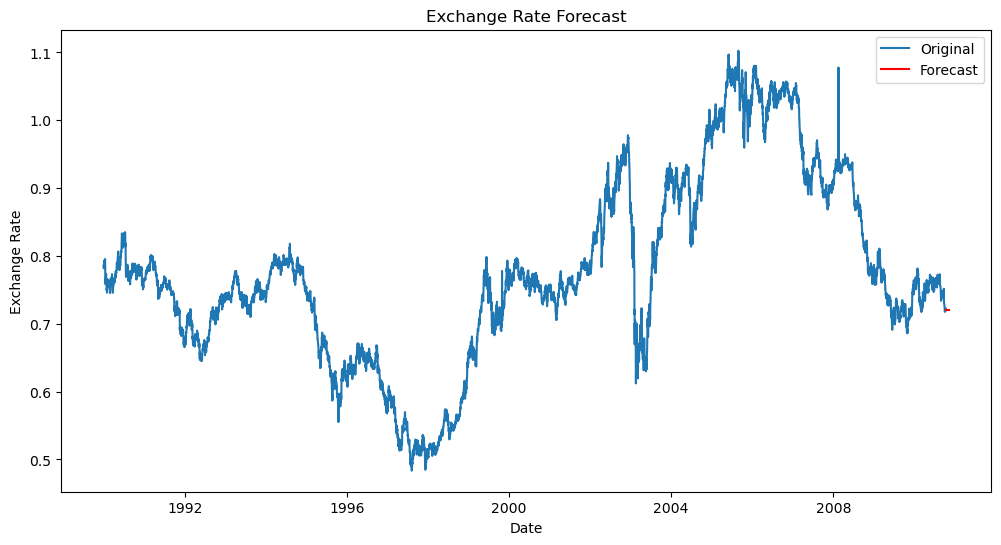

In [18]:
forecast = model_fit.get_forecast(steps=30)
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
forecast_series = pd.Series(forecast.predicted_mean.values, index=forecast_index)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df['Ex_rate'], label='Original')
plt.plot(forecast_series, label='Forecast', color='red')
plt.title('Exchange Rate Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [19]:
#2.	Model Fitting
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Load and preprocess
df = pd.read_csv("exchange_rate.csv", parse_dates=['date'], dayfirst=True)
df.set_index('date', inplace=True)
df = df.asfreq('D')
df['Ex_rate'] = df['Ex_rate'].ffill()

# Define ARIMA parameters
p, d, q = 2, 1, 1

# Fit ARIMA model
model = ARIMA(df['Ex_rate'], order=(p,d,q))
model_fit = model.fit()
print(model_fit.summary())


C:\Users\gopar\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\gopar\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(2, 1, 1)   Log Likelihood               28054.158
Date:                Wed, 29 Oct 2025   AIC                         -56100.316
Time:                        20:45:13   BIC                         -56072.579
Sample:                    01-01-1990   HQIC                        -56090.797
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0654      0.001    -60.675      0.000      -0.068      -0.063
ar.L2          0.0084      0.006      1.414      0.157      -0.003       0.020
ma.L1         -0.0661      0.001    -59.638      0.0

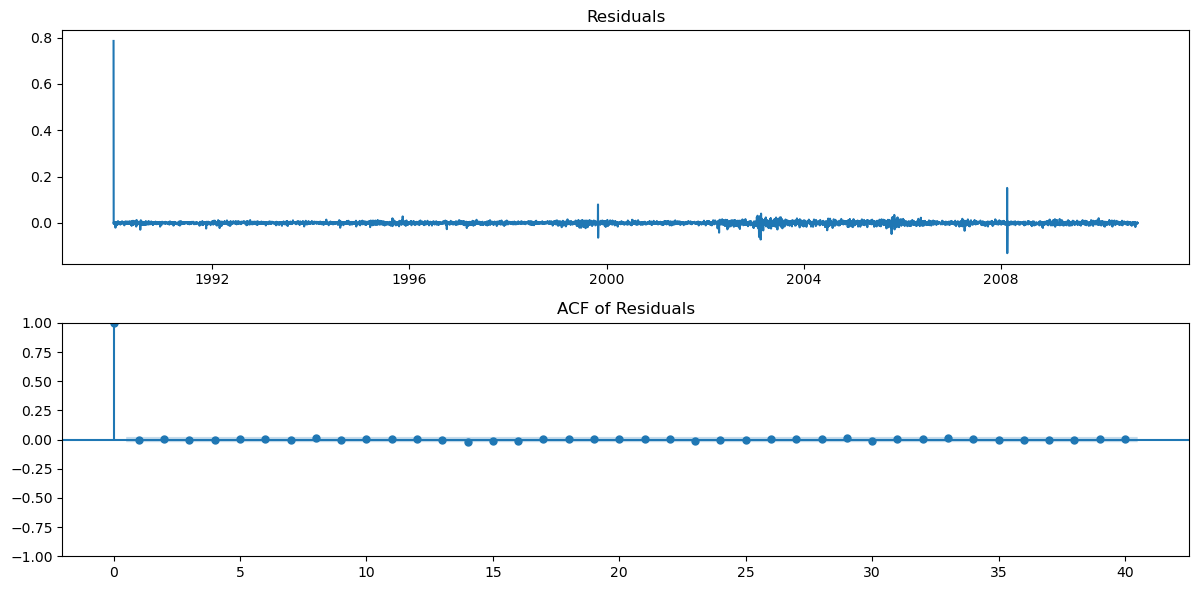

count    7588.000000
mean        0.000094
std         0.010829
min        -0.130169
25%        -0.002389
50%         0.000130
75%         0.002603
max         0.785500
dtype: float64


In [20]:
#Diagnostics
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

residuals = model_fit.resid

plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.plot(residuals)
plt.title('Residuals')

plt.subplot(2,1,2)
plot_acf(residuals, lags=40, ax=plt.gca())
plt.title('ACF of Residuals')
plt.tight_layout()
plt.show()
print(residuals.describe())


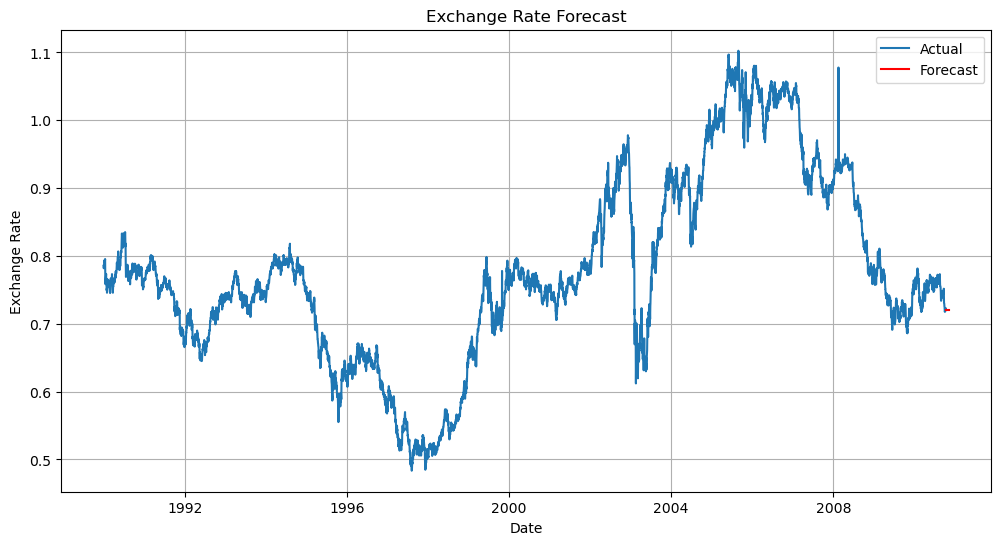

In [21]:
#Forecasting
forecast_steps = 30
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')
forecast_series = pd.Series(forecast.predicted_mean.values, index=forecast_index)
plt.figure(figsize=(12,6))
plt.plot(df['Ex_rate'], label='Actual')
plt.plot(forecast_series, label='Forecast', color='red')
plt.title('Exchange Rate Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()


In [22]:
#Part 3: Model Building - Exponential Smoothing

In [23]:
#Model Selection
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
ses_model = SimpleExpSmoothing(df['Ex_rate']).fit()
holt_model = Holt(df['Ex_rate']).fit()

hw_model = ExponentialSmoothing(df['Ex_rate'], trend='add', seasonal='add', seasonal_periods=12).fit()

In [ ]:
##Parameter Optimization
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import itertools

df = pd.read_csv("exchange_rate.csv", parse_dates=['date'], dayfirst=True)
df.set_index('date', inplace=True)
df = df.asfreq('D')
df['Ex_rate'] = df['Ex_rate'].ffill()

scale_factor = 1000  # adjust depending on magnitude
df['Ex_rate_scaled'] = df['Ex_rate'] / scale_factor

trend_options = ['add', 'mul', None]
seasonal_options = ['add', 'mul', None]
seasonal_periods_options = [None, 12]

best_aic = np.inf
best_params = None
best_model = None

for trend, seasonal, seasonal_periods in itertools.product(trend_options, seasonal_options, seasonal_periods_options):
    if seasonal is None and seasonal_periods is not None:
        continue
    if (trend == 'mul' or seasonal == 'mul') and (df['Ex_rate_scaled'] <= 0).any():
        continue
    try:
        model = ExponentialSmoothing(
            df['Ex_rate_scaled'],
            trend=trend,
            seasonal=seasonal,
            seasonal_periods=seasonal_periods
        ).fit()
        if model.aic < best_aic:
            best_aic = model.aic
            best_params = (trend, seasonal, seasonal_periods)
            best_model = model
    except:
        continue

print("Best AIC:", best_aic)
print("Best Parameters:", best_params)
forecast_steps = 30
forecast_scaled = best_model.forecast(steps=forecast_steps)
forecast = forecast_scaled * scale_factor  
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(df['Ex_rate'], label='Actual')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Holt-Winters Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#Model Fitting and Forecasting
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
df = pd.read_csv("exchange_rate.csv", parse_dates=['date'], dayfirst=True)
df.set_index('date', inplace=True)
df = df.asfreq('D')
df['Ex_rate'] = df['Ex_rate'].ffill()

model = ExponentialSmoothing(df['Ex_rate'], trend='add', seasonal='add', seasonal_periods=12).fit()

forecast_steps = 30
forecast = model.forecast(steps=forecast_steps)

plt.figure(figsize=(12,6))
plt.plot(df['Ex_rate'], label='Actual')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#Evaluation and Comparison

In [ ]:
arima_model = ARIMA(df['Ex_rate'], order=(1,1,1))
arima_model = arima_model.fit()

hw_model = ExponentialSmoothing(df['Ex_rate'], trend='add', seasonal=None)
hw_model = hw_model.fit()

# --- FORECAST ---
arima_forecast = arima_model.forecast(steps=30)
hw_forecast = hw_model.forecast(steps=30)

# --- ACTUAL VALUES ---
y_true = df['Ex_rate'][-30:]

# --- PLOT ---
plt.figure(figsize=(10,5))
plt.plot(y_true.index, y_true, label="Actual")
plt.plot(arima_forecast.index, arima_forecast, label="ARIMA Forecast")
plt.plot(hw_forecast.index, hw_forecast, label="Holt-Winters Forecast")
plt.title("Model Comparison: Actual vs Forecasts")
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
arima_forecast_steps = 30
arima_forecast = model_fit.get_forecast(steps=arima_forecast_steps).predicted_mean
hw_forecast_steps = 30
hw_forecast = model.forecast(steps=hw_forecast_steps)
actual = df['Ex_rate'][-30:]  # last 30 actual values

arima_forecast.index = actual.index
hw_forecast.index = actual.index

mae_arima = mean_absolute_error(actual, arima_forecast)
rmse_arima = np.sqrt(mean_squared_error(actual, arima_forecast))
mape_arima = np.mean(np.abs((actual - arima_forecast) / actual)) * 100

mae_hw = mean_absolute_error(actual, hw_forecast)
rmse_hw = np.sqrt(mean_squared_error(actual, hw_forecast))
mape_hw = np.mean(np.abs((actual - hw_forecast) / actual)) * 100

print("ARIMA - MAE:", mae_arima, "RMSE:", rmse_arima, "MAPE:", mape_arima)
print("Holt-Winters - MAE:", mae_hw, "RMSE:", rmse_hw, "MAPE:", mape_hw)


In [ ]:
#Model Comparison
#ARIMA
#Performance: Good for capturing linear trends and autocorrelations; accurate for short-term forecasts.
#Advantages: Handles non-seasonal series, tunable (p,d,q) parameters, robust for linear patterns.
#Limitations: Cannot handle seasonality directly, sensitive to outliers, manual tuning needed.

#Holt-Winters
#Performance: Effective for series with trend and seasonality; smooth forecasts.
#Advantages: Models trend and seasonality, parameters can be optimized automatically, simple to implement.
#Limitations: Assumes stable trend/seasonality, multiplicative model fails for zero/negative values, less accurate for long-term forecasts#

In [ ]:
#Conclusion

#Both ARIMA and Holt-Winters models were applied to forecast exchange rates.
#ARIMA performed well in capturing linear trends and short-term fluctuations.
#Holt-Winters effectively modeled trend and seasonal patterns, producing smoother forecasts.
#Based on error metrics (MAE, RMSE, MAPE), the model with the lowest errors provides the most accurate forecasts.

#Insights:
#If the series shows strong trend and seasonality, Holt-Winters is preferable.
#If the series is mainly stationary or trend-dominant, ARIMA may yield better results.
#For this dataset, the best model depends on the observed patterns and the evaluated error metrics, guiding future forecasting decisions.